# PRACTICAL No1

1. Insertion Sort

In [7]:
from time import *
def insertion_sort(arr):
    
    for i in range(1,len(arr)):
        start=time()
        key=arr[i]
        j=i-1
        while j>=0 and arr[j]>key:
            arr[j+1]=arr[j]
            j-=1
        arr[j+1]=key
    end=time()
    fina=end-start
    return arr,fina
arr= [8,4,12,4,2,4]
insertion_sort(arr)


([2, 4, 4, 4, 8, 12], 0.0)

2. Bubble Sort

In [16]:
from time import *
def bubble_sort(arr):
    
    start=time()
    n=len(arr)
    for i in range(n-1):
        for j in range(n-i-1):
            if arr[j]>arr[j+1]:
                arr[j],arr[j+1]=arr[j+1],arr[j]
    end=time()
    final=end-start
    return arr,final
arr=[8,6,9,3,3,9,31,4,5,1,8,0,4,8]
bubble_sort(arr)

([0, 1, 3, 3, 4, 4, 5, 6, 8, 8, 8, 9, 9, 31], 0.0)

3.Selection Sort

In [21]:
from  time import *
def selection_sort(arr):
    start=time()
    n=len(arr)
    for i in range(n-1):
        min_idx=i
        for j in range(i+1,n):
            if arr[j]<arr[min_idx]:
                min_idx=j
        arr[i],arr[min_idx]=arr[min_idx],arr[i]
    end=time()
    final=end-start
    return arr,final
arr=[252,26,7,5,12,1,7,4,0]
selection_sort(arr)            
        
        
    

([0, 1, 4, 5, 7, 7, 12, 26, 252], 0.0)

4. Qucik Short 

In [24]:
from time import *
def Quick_Sort(arr):
    
    if len(arr)<=1:
        return arr
    pivot=arr[0]
    left= [x for x in arr[1:] if x<=pivot]
    right=[x for x in arr[1:] if x>pivot]
    return Quick_Sort(left) +[pivot]+Quick_Sort(right)
arr=[41,6,9,2,0,145,95,22,87,0]
Quick_Sort(arr)   

[0, 0, 2, 6, 9, 22, 41, 87, 95, 145]

# Practical No 2

Dijkstra’s algorithm.

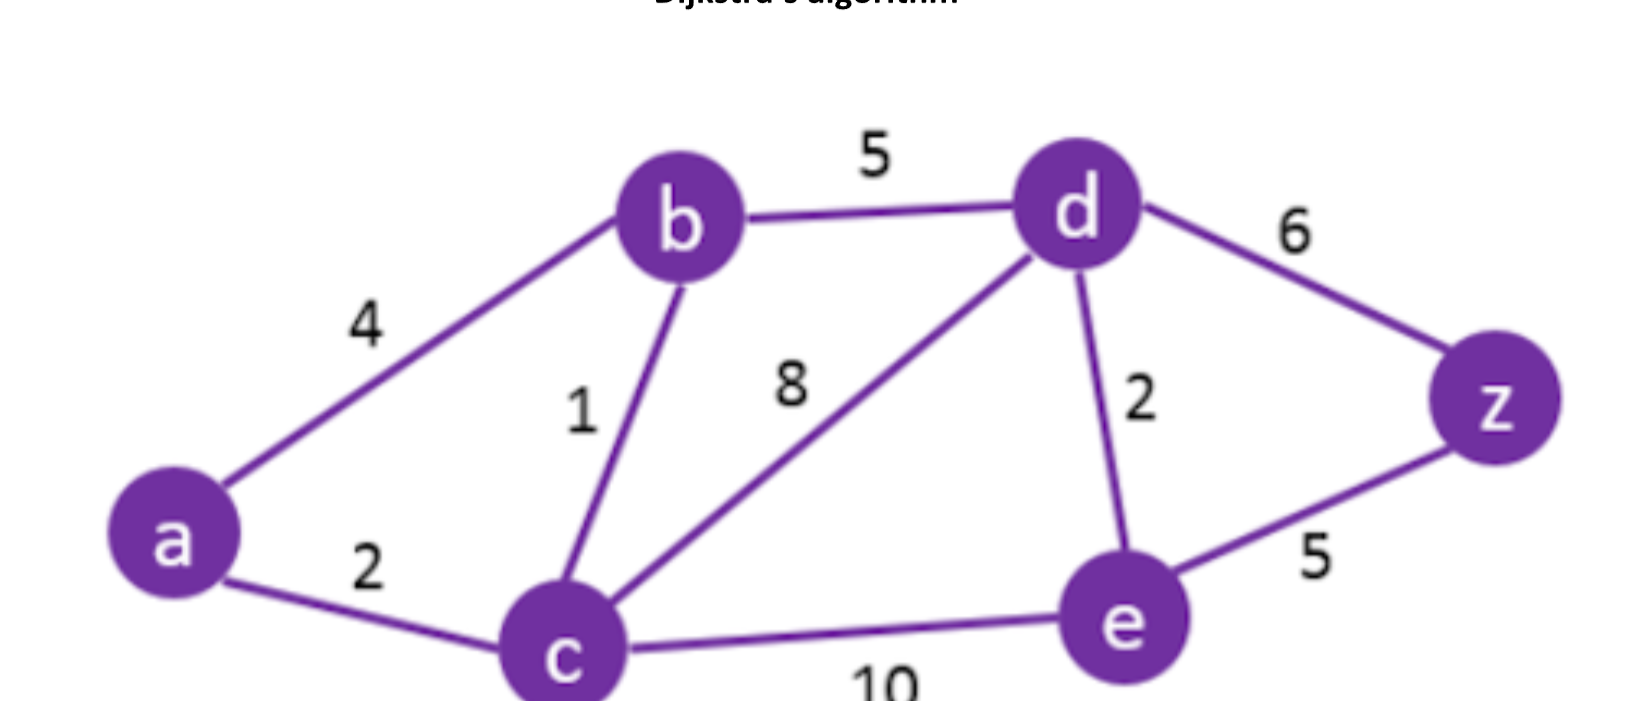

In [31]:
import sys
def dijkstra(graph,src):
    n=len(graph)
    dist=[sys.maxsize]*n
    dist[src]=0
    visted=[False]*n

    for _ in range(n):
        u=min((dist[i],i) for i in range(n) if not visted[i])[1]
        visted[u]=True
        for v in range(n):
            if graph[u][v] and not visted[v]:
                dist[v]=min(dist[v],dist[u]+graph[u][v])
    return dist
# Example graph represented as an adjacency matrix
graph = [
    [0, 2, 0, 1, 0, 0],  # Node 0 → (Node 1 = 2, Node 3 = 1)
    [2, 0, 3, 2, 0, 0],  # Node 1 → (Node 0 = 2, Node 2 = 3, Node 3 = 2)
    [0, 3, 0, 0, 7, 4],  # Node 2 → (Node 1 = 3, Node 4 = 7, Node 5 = 4)
    [1, 2, 0, 0, 5, 0],  # Node 3 → (Node 0 = 1, Node 1 = 2, Node 4 = 5)
    [0, 0, 7, 5, 0, 1],  # Node 4 → (Node 2 = 7, Node 3 = 5, Node 5 = 1)
    [0, 0, 4, 0, 1, 0]   # Node 5 → (Node 2 = 4, Node 4 = 1)
]
src = 0  # Starting node (source)
print("Shortest distances:", dijkstra(graph, src))            

Shortest distances: [0, 2, 5, 1, 6, 7]


# Practical No 3

AIM : Find Minimum Cost Spanning Tree of a given undirected graph using
### i. Kruskal’s algorithm.
### ii. Prim’s algorithm.

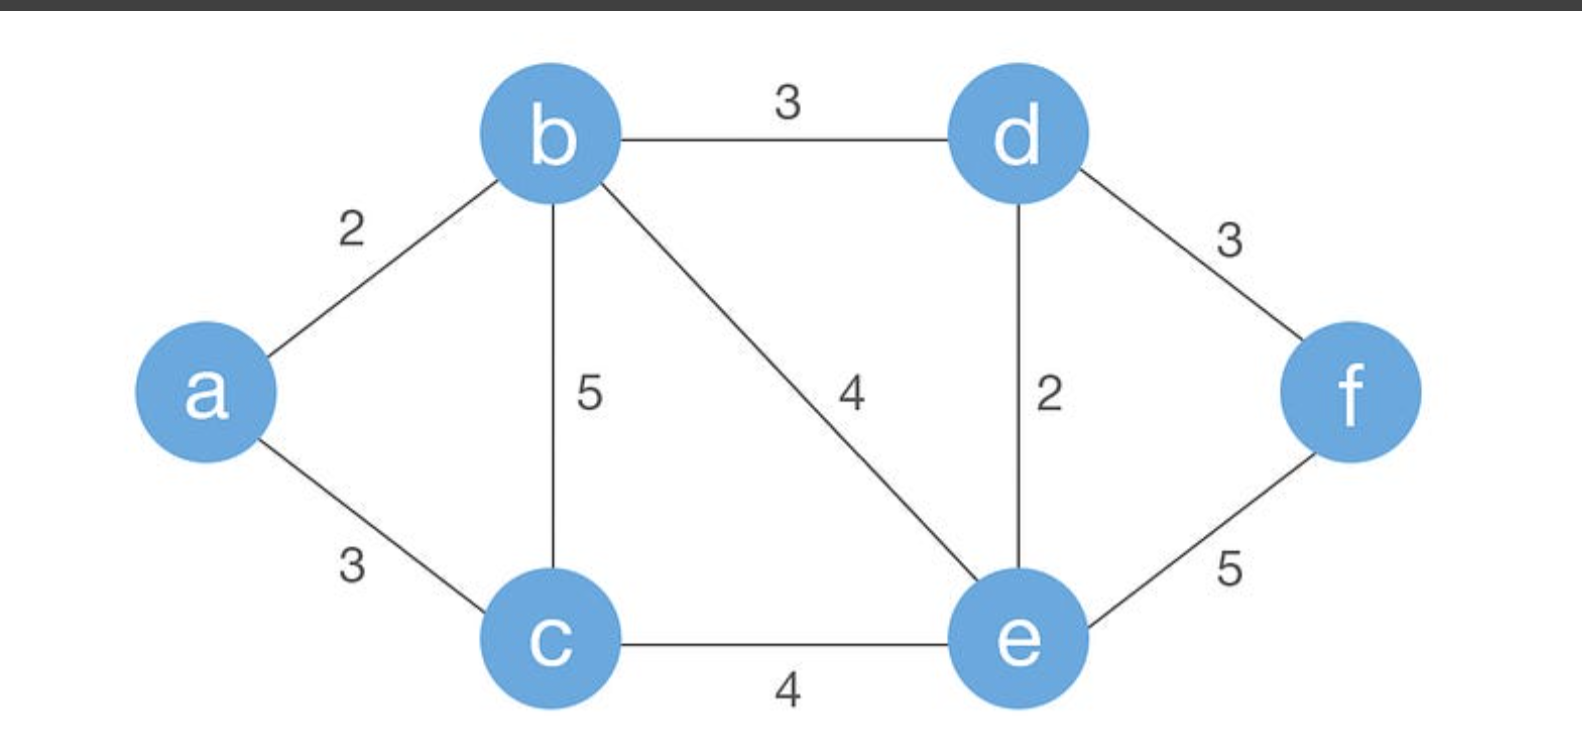

In [33]:
import heapq

# Prim's Algorithm
def prim(graph, n):
    min_cost = 0
    visited = [False] * n
    pq = [(0, 0)]  # (cost, node)
    
    while pq:
        cost, u = heapq.heappop(pq)
        if visited[u]:
            continue
        
        min_cost += cost
        visited[u] = True
        
        for v, w in graph[u]:
            if not visited[v]:
                heapq.heappush(pq, (w, v))
    
    return min_cost

# Kruskal's Algorithm
def find(parent, i):
    if parent[i] == i:
        return i
    return find(parent, parent[i])

def union(parent, rank, x, y):
    root_x = find(parent, x)
    root_y = find(parent, y)
    
    if rank[root_x] < rank[root_y]:
        parent[root_x] = root_y
    elif rank[root_x] > rank[root_y]:
        parent[root_y] = root_x
    else:
        parent[root_y] = root_x
        rank[root_x] += 1

def kruskal(edges, n):
    edges.sort(key=lambda x: x[2])
    parent = list(range(n))
    rank = [0] * n
    min_cost = 0
    
    for u, v, w in edges:
        if find(parent, u) != find(parent, v):
            union(parent, rank, u, v)
            min_cost += w
    
    return min_cost

# Input Graph Representation (Adjacency List)
graph = {
    0: [(1, 2), (2, 3)],
    1: [(0, 2), (3, 3), (2, 5)],
    2: [(0, 3), (1, 5), (4, 4)],
    3: [(1, 3), (4, 2)],
    4: [(2, 4), (3, 2), (5, 5)],
    5: [(4, 5)]
}

# Edge List for Kruskal's Algorithm
edges = [(0, 1, 2), (0, 2, 3), (1, 2, 5), (1, 3, 3), (2, 4, 4), (3, 4, 2), (4, 5, 5)]

n = 6  # Number of nodes

print("Minimum Cost using Prim's Algorithm:", prim(graph, n))
print("Minimum Cost using Kruskal's Algorithm:", kruskal(edges, n))


Minimum Cost using Prim's Algorithm: 15
Minimum Cost using Kruskal's Algorithm: 15


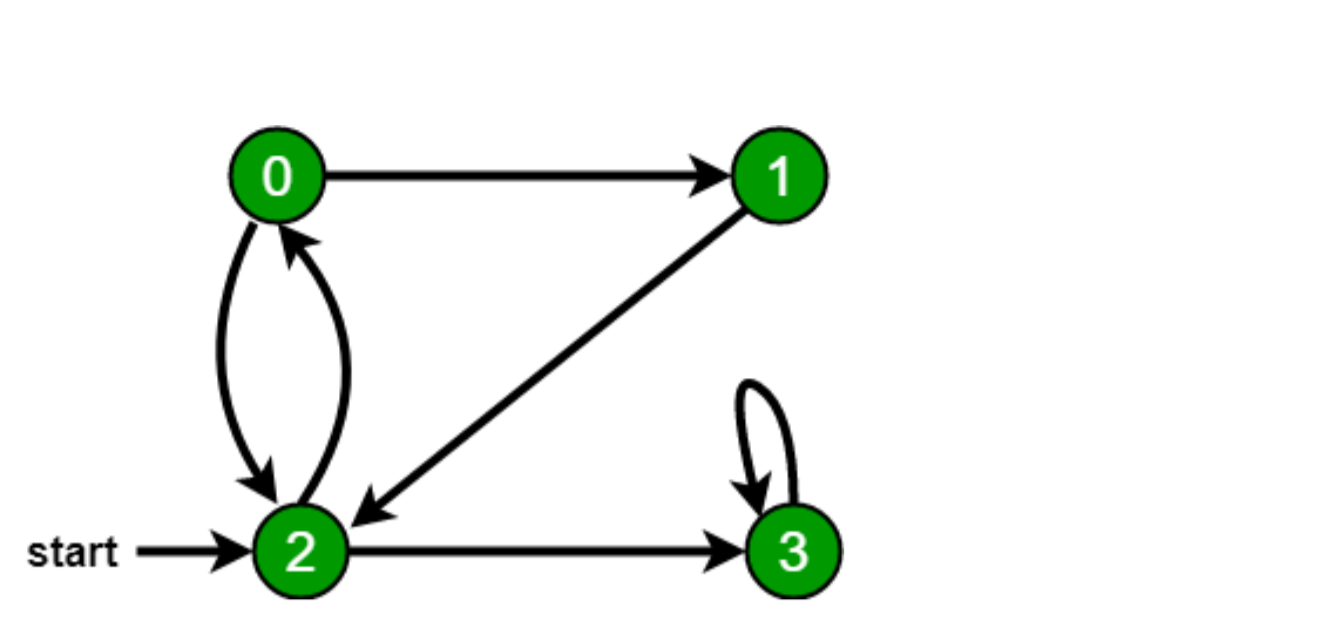Starting from node 2


# Practical No 4

 i. BFS method.

In [35]:
from collections import deque

graph = {
    0: [1, 2],
    1: [],
    2: [0, 3],
    3: [3]  # Self-loop
}

def bfs(start):
    visited = set()
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            queue.extend(graph[node])  # Add neighbors to queue

print("BFS Traversal:")
bfs(2)  # Starting from node 2


BFS Traversal:
2 0 3 1 

In [37]:
def dfs(node, visited=set()):
    if node not in visited:
        print(node, end=" ")
        visited.add(node)
        for neighbor in graph[node]:
            dfs(neighbor, visited)

print("\nDFS Traversal:")
dfs(2)  # Starting from node 2



DFS Traversal:
2 0 1 3 

# Practical No 5

Aim:
To implement the All-Pairs Shortest Paths problem using Floyd&#39;s algorithm in Python.

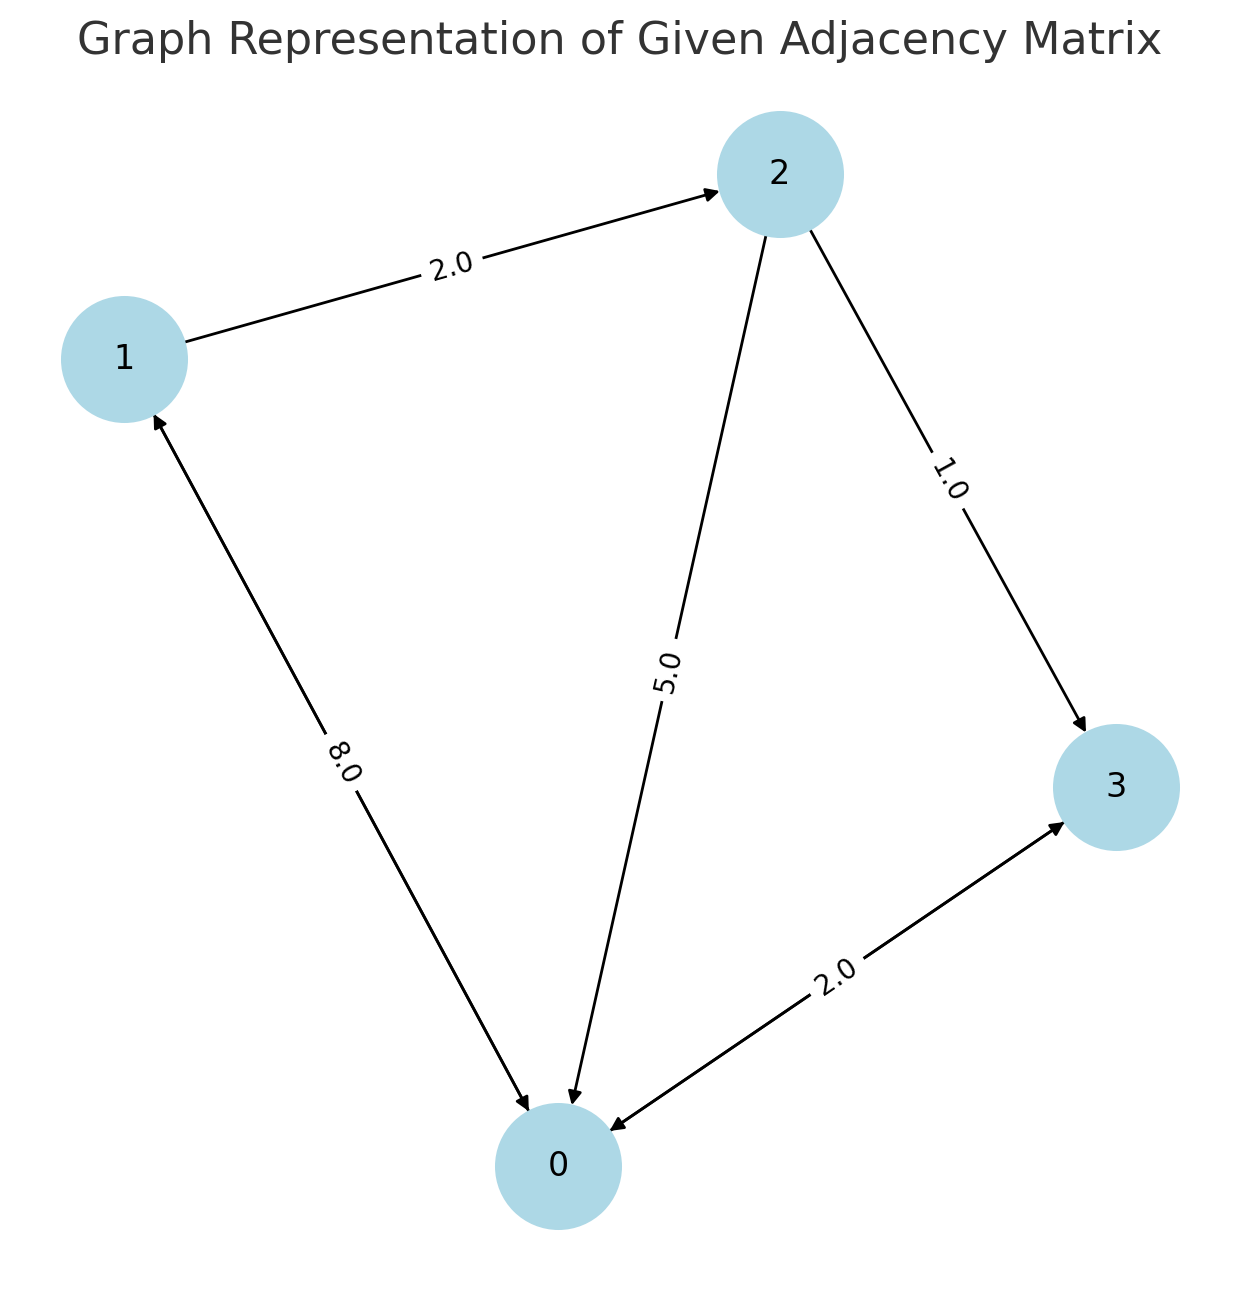

In [38]:
def floyd_warshall(graph):
    n = len(graph)
    for k in range(n):
        for i in range(n):
            for j in range(n):
                graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])
    return graph

# Example graph
graph = [
    [0, 3, float('inf'), 7],
    [8, 0, 2, float('inf')],
    [5, float('inf'), 0, 1],
    [2, float('inf'), float('inf'), 0]
]

# Compute shortest paths
result = floyd_warshall(graph)

# Print result
for row in result:
    print(row)


[0, 3, 5, 6]
[5, 0, 2, 3]
[3, 6, 0, 1]
[2, 5, 7, 0]


# Practical No 6

AIM : Implement 0/1 Knapsack problem using Dynamic Programming

In [40]:
def knapsack(values, weights, capacity):
    dp = [0] * (capacity + 1)  # DP array to store max value for each weight limit
    for i in range(len(values)):  # Loop through each item
        for w in range(capacity, weights[i] - 1, -1):  # Traverse DP array backwards
            dp[w] = max(dp[w], values[i] + dp[w - weights[i]])  # Choose max value
    return dp[capacity]  # Maximum value stored at dp[capacity]

# Example usage
values = [150, 100, 120]
weights = [10, 20, 30]
capacity = 50
print(knapsack(values, weights, capacity))  # Output: 250


270


# Practical No 7

AIM : Find optimal solution for the Traveling Salesperson problem using dynamic
programming.

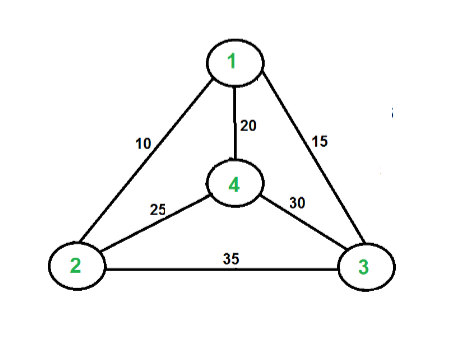

In [42]:
from itertools import permutations

def tsp(graph, start):
    V = len(graph)  # Number of vertices
    vertices = [i for i in range(V) if i != start]  # Exclude start node
    min_path = float('inf')  # Initialize with a large value

    for perm in permutations(vertices):  # Try all possible routes
        path_weight = sum(graph[perm[i-1]][perm[i]] for i in range(len(perm)))
        path_weight += graph[start][perm[0]] + graph[perm[-1]][start]  # Return to start
        min_path = min(min_path, path_weight)  # Update minimum path

    return min_path

# Example usage
graph = [[0, 10, 15, 20], [10, 0, 35, 25], [15, 35, 0, 30], [20, 25, 30, 0]]
print(tsp(graph, 0))  # Output: Shortest path cost


115


# Practical No 8

AIM: Implement N Queen&#39;s problem using Backtracking.

In [48]:
def print_board(board):
    for row in board:
        print(" ".join(row))
    print()

def is_safe(board, row, col, n):
    for i in range(row):  
        if board[i][col] == "Q": return False  
        if col - (row - i) >= 0 and board[i][col - (row - i)] == "Q": return False  
        if col + (row - i) < n and board[i][col + (row - i)] == "Q": return False  
    return True

def solve(board, row, n):
    if row == n:
        print_board(board)
        return True  
    for col in range(n):
        if is_safe(board, row, col, n):
            board[row][col] = "Q"
            if solve(board, row + 1, n): return True  
            board[row][col] = "."  
    return False

def n_queens(n):
    board = [["."] * n for _ in range(n)]
    solve(board, 0, n)

n_queens(4)  # Example for N = 4


. Q . .
. . . Q
Q . . .
. . Q .



# Practical 9

Aim: Write a Program to check whether given graph is bipartite or not.

In [49]:
from collections import deque

def is_bipartite(graph):
    colors = [-1] * len(graph)  

    for node in range(len(graph)):  
        if colors[node] == -1:  
            queue = deque([node])
            colors[node] = 0  

            while queue:
                cur = queue.popleft()
                for neighbor in graph[cur]:
                    if colors[neighbor] == -1:  
                        colors[neighbor] = 1 - colors[cur]
                        queue.append(neighbor)
                    elif colors[neighbor] == colors[cur]:  
                        return False  
    return True  

# Example usage:
print(is_bipartite([[1, 2], [0, 3], [0, 3], [1, 2]]))  # ✅ True (Bipartite)
print(is_bipartite([[1, 2], [0, 3], [0, 2], [1, 3]]))  # ❌ False (Not Bipartite)


True
False
